## Sampling Method

In [1]:
boston <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data')

In [2]:
install.packages("dplyr")
library("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
colnames(boston) = c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV')

In [4]:
head(boston)
dim(boston)
summary(boston)
str(boston)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


### Sample Size Selection

To select an appropriate sample size, we want to look out our target feature `MEDV` and see which sample size may be a sufficient representation of the population.

In [5]:
set.seed(40)

In [26]:
library(ggplot2)
library(reshape2)

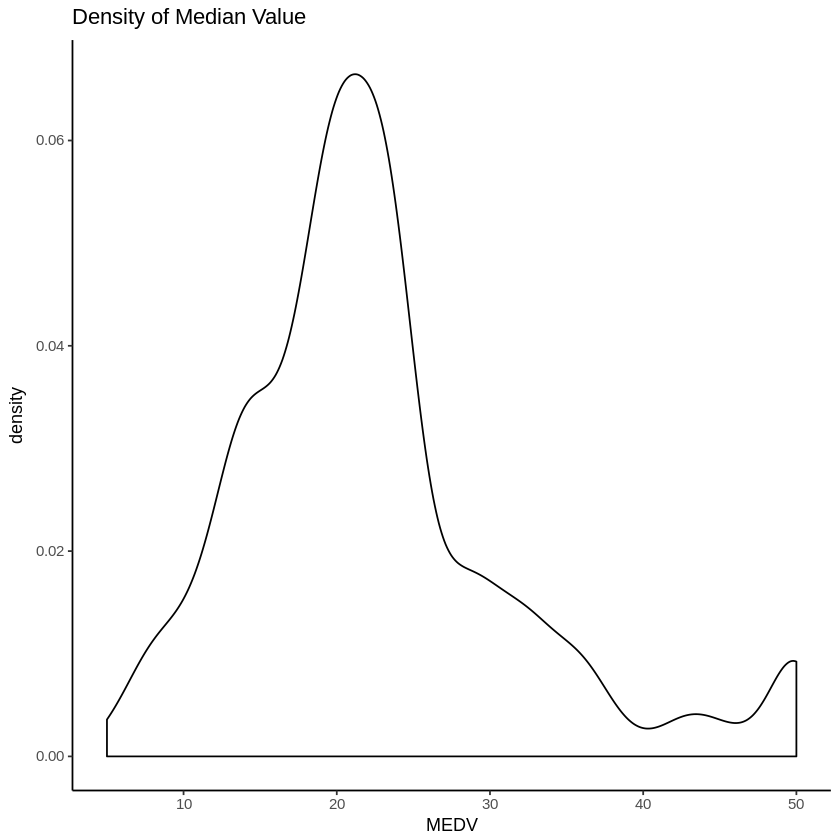

In [32]:
ggplot(boston, aes(x=MEDV)) + 
    theme_classic() +
    geom_density(alpha = 0.5) +
    ggtitle("Density of Median Value")


In [11]:
randomSample = function(df, n){
    return (df[sample(nrow(df), n),])
}

#### 1% sample
$0.01 * 506 = 5$


In [18]:
boston1_1 <- randomSample(boston,5)
boston1_2 <- randomSample(boston,5)
boston1_3 <- randomSample(boston,5)
boston1_4 <- randomSample(boston,5)
boston1_5 <- randomSample(boston,5)

In [52]:
boston1df <- data.frame(boston1_1$MEDV)
boston1df <- cbind(boston1df, boston1_2$MEDV)
boston1df <- cbind(boston1df, boston1_3$MEDV)
boston1df <- cbind(boston1df, boston1_4$MEDV)
boston1df <- cbind(boston1df, boston1_5$MEDV)

names(boston1df)[1] <- "samp1"
names(boston1df)[2] <- "samp2"
names(boston1df)[3] <- "samp3"
names(boston1df)[4] <- "samp4"
names(boston1df)[5] <- "samp5"

No id variables; using all as measure variables


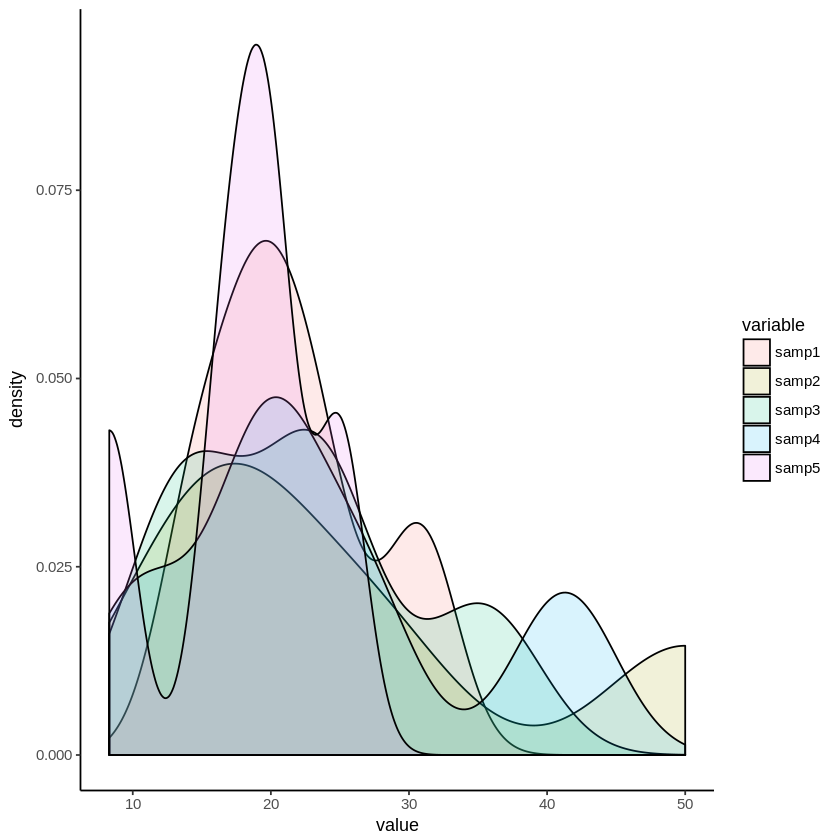

In [53]:
data <- melt(boston1df)
ggplot(data, aes(x = value, fill = variable)) +
    geom_density(alpha=0.15) +
    theme_classic()

#### 5% sample
$0.05 * 506 = 25$


In [54]:
boston5_1 <- randomSample(boston,25)
boston5_2 <- randomSample(boston,25)
boston5_3 <- randomSample(boston,25)
boston5_4 <- randomSample(boston,25)
boston5_5 <- randomSample(boston,25)

In [55]:
boston5df <- data.frame(boston5_1$MEDV)
boston5df <- cbind(boston5df, boston5_2$MEDV)
boston5df <- cbind(boston5df, boston5_3$MEDV)
boston5df <- cbind(boston5df, boston5_4$MEDV)
boston5df <- cbind(boston5df, boston5_5$MEDV)

names(boston5df)[1] <- "samp1"
names(boston5df)[2] <- "samp2"
names(boston5df)[3] <- "samp3"
names(boston5df)[4] <- "samp4"
names(boston5df)[5] <- "samp5"

No id variables; using all as measure variables


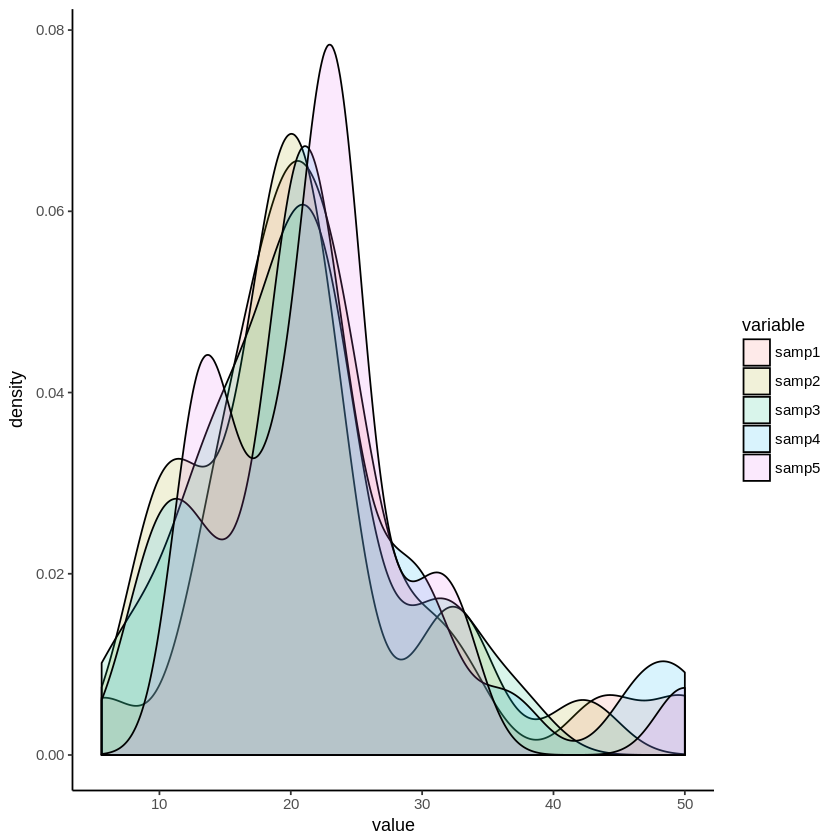

In [56]:
data <- melt(boston5df)
ggplot(data, aes(x = value, fill = variable)) +
    geom_density(alpha=0.15) +
    theme_classic()

#### 10% sample
$0.10 * 506 = 51%

In [ ]:
boston10_1 <- randomSample(boston,51)
boston10_2 <- randomSample(boston,51)
boston10_3 <- randomSample(boston,51)
boston10_4 <- randomSample(boston,51)
boston10_5 <- randomSample(boston,51)

#### Sample Calculator

Using a [Sample Size Calculator](https://www.surveymonkey.com/mp/sample-size-calculator/), with a population size of 506, to have a CI = 90% and margin of error = 10%, we would need a sample size of 60, which is approx. 12% of the data.

In [60]:
boston12_1 <- randomSample(boston,60)
boston12_2 <- randomSample(boston,60)
boston12_3 <- randomSample(boston,60)
boston12_4 <- randomSample(boston,60)
boston12_5 <- randomSample(boston,60)


In [58]:
boston12df <- data.frame(boston12_1$MEDV)
boston12df <- cbind(boston12df, boston12_2$MEDV)
boston12df <- cbind(boston12df, boston12_3$MEDV)
boston12df <- cbind(boston12df, boston12_4$MEDV)
boston12df <- cbind(boston12df, boston12_5$MEDV)

names(boston12df)[1] <- "samp1"
names(boston12df)[2] <- "samp2"
names(boston12df)[3] <- "samp3"
names(boston12df)[4] <- "samp4"
names(boston12df)[5] <- "samp5"

No id variables; using all as measure variables


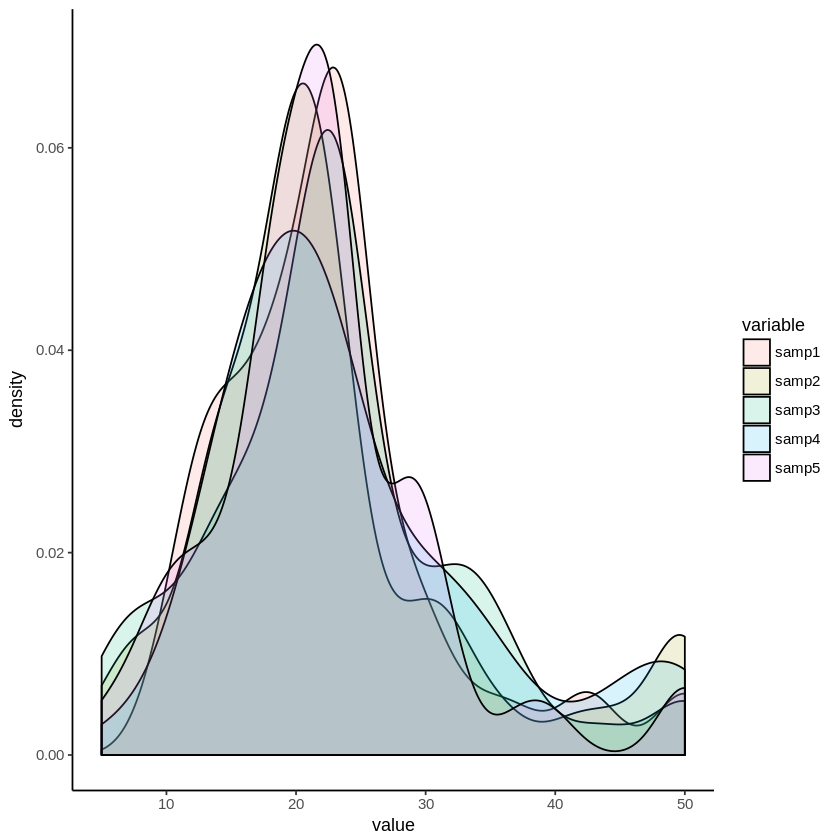

In [59]:
data <- melt(boston12df)
ggplot(data, aes(x = value, fill = variable)) +
    geom_density(alpha=0.15) +
    theme_classic()

In [ ]:
#### 30% sample
$0.30 * 506 = 51%